In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [22]:
df_init = pd.read_csv("data/data_cleaned_ph2.csv")
df_ref = pd.read_csv("data/lof/data-lof-2024-04-22.csv")

In [23]:
df = pd.read_csv("data/knn/data-knn-2024-04-29.csv")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119940 entries, 0 to 119939
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        119940 non-null  int64  
 1   id_mls                    119940 non-null  object 
 2   bathrooms_total           119940 non-null  float64
 3   bedrooms_extra            119940 non-null  float64
 4   bedrooms                  119940 non-null  float64
 5   stories_total             119940 non-null  float64
 6   size_interior             119940 non-null  float64
 7   building_type             119940 non-null  object 
 8   agency_name               119940 non-null  object 
 9   agency_type               119940 non-null  object 
 10  property_type             119940 non-null  object 
 11  lng                       119940 non-null  float64
 12  lat                       119940 non-null  float64
 13  ownership_type            119940 non-null  o

In [25]:
df["province"].value_counts()

province
Ontario                    55717
British Columbia           26810
Alberta                    16470
Quebec                      8074
Saskatchewan                4767
Manitoba                    3597
Nova Scotia                 2037
New Brunswick               1462
Prince Edward Island         432
Newfoundland & Labrador      412
Yukon                        106
Northwest Territories         56
Name: count, dtype: int64

In [26]:
df["province"].value_counts()

province
Ontario                    55717
British Columbia           26810
Alberta                    16470
Quebec                      8074
Saskatchewan                4767
Manitoba                    3597
Nova Scotia                 2037
New Brunswick               1462
Prince Edward Island         432
Newfoundland & Labrador      412
Yukon                        106
Northwest Territories         56
Name: count, dtype: int64

In [27]:
# df = df.drop(["id", "id_mls", "agency_name", "agency_type", "property_type", "ownership_type", "land_size", "page_url", "timestamp", "postal_code"], axis=1)
# df.info()

In [28]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       55717.0
mean       927155.0
std        650106.0
min        159900.0
25%        599900.0
50%        799000.0
75%       1099000.0
max      84900000.0
Name: price, dtype: float64

## Removing Interior Size Outliers from top

<Axes: title={'center': 'size_interior'}, xlabel='province'>

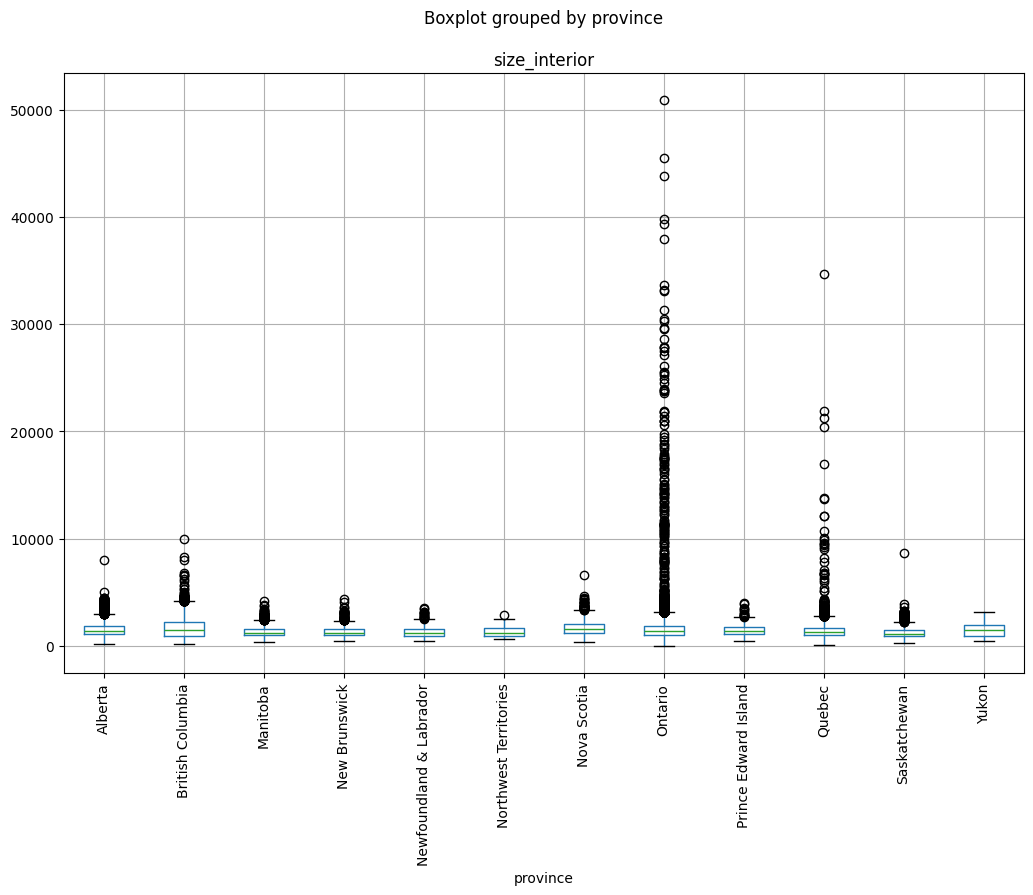

In [29]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

In [30]:
q0 = 0
q25 = df_init["size_interior"].quantile(0.25)
q75 = df_init["size_interior"].quantile(0.75)
iqr = q75 - q25

df = df[(df["size_interior"]>=abs(q25-q0)*0.33) & (df["size_interior"] < (q75+1.5*iqr))]

abs(q25-q0)*0.33

335.94

<Axes: title={'center': 'size_interior'}, xlabel='province'>

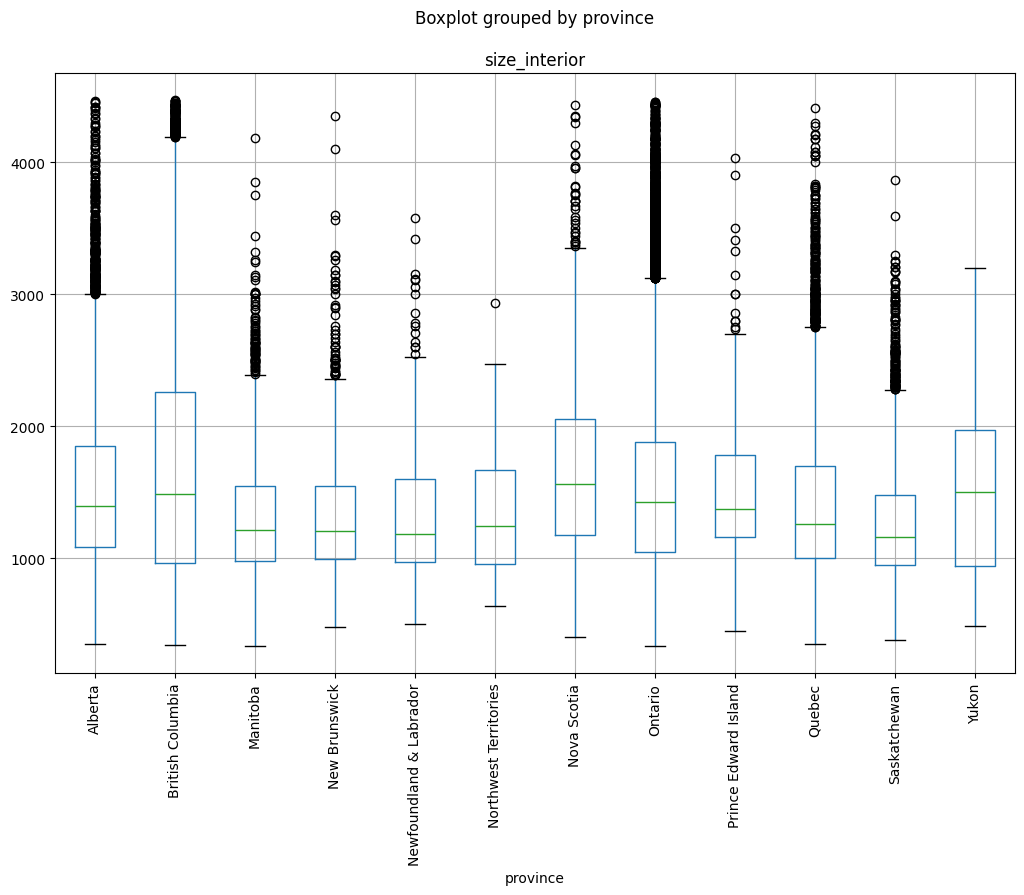

In [31]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

<Axes: title={'center': 'price'}, xlabel='province'>

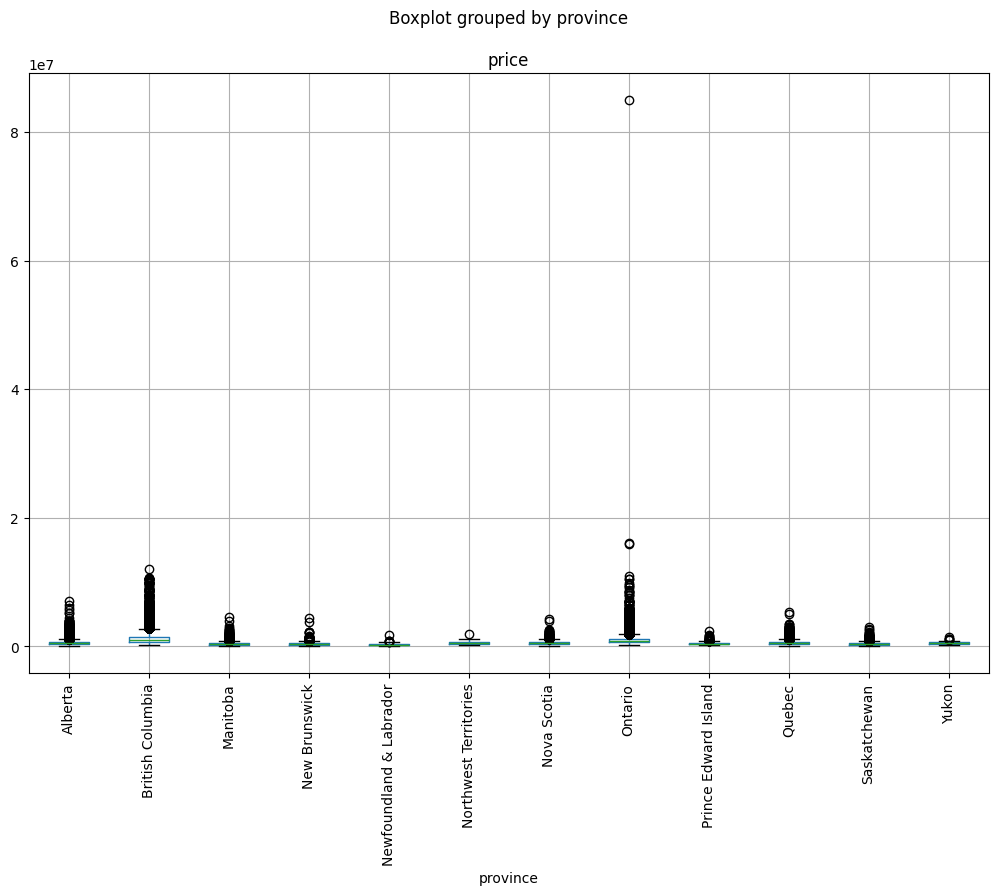

In [32]:
df.boxplot(column="price", by="province", figsize=(12,8), rot=90)

In [33]:
df["province"].value_counts()

province
Ontario                    55491
British Columbia           26763
Alberta                    16467
Quebec                      8032
Saskatchewan                4765
Manitoba                    3597
Nova Scotia                 2035
New Brunswick               1462
Prince Edward Island         432
Newfoundland & Labrador      412
Yukon                        106
Northwest Territories         56
Name: count, dtype: int64

In [34]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       55491.0
mean       926822.0
std        646934.0
min        159900.0
25%        599900.0
50%        799000.0
75%       1099000.0
max      84900000.0
Name: price, dtype: float64

# Anomaly Reduction

In [35]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [36]:
# Detect anomalies on the new dataset based on the previous dataset
lof = LocalOutlierFactor(n_neighbors=10, novelty=True)
scaler = StandardScaler()

df_ref_scaled = scaler.fit_transform(df_ref[["price", "size_interior", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])
df_scaled = scaler.transform(df[["price", "size_interior", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])
# lof_labels = lof.fit_predict(df_scaled)
# df = df[lof_labels==1]

# lof_labels = lof.fit_predict(df[["price", "size_interior", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])
# df = df[lof_labels==1]

lof.fit(df_ref_scaled)

lof_labels = lof.predict(df_scaled)

df = df[lof_labels==1]

<Axes: title={'center': 'size_interior'}, xlabel='province'>

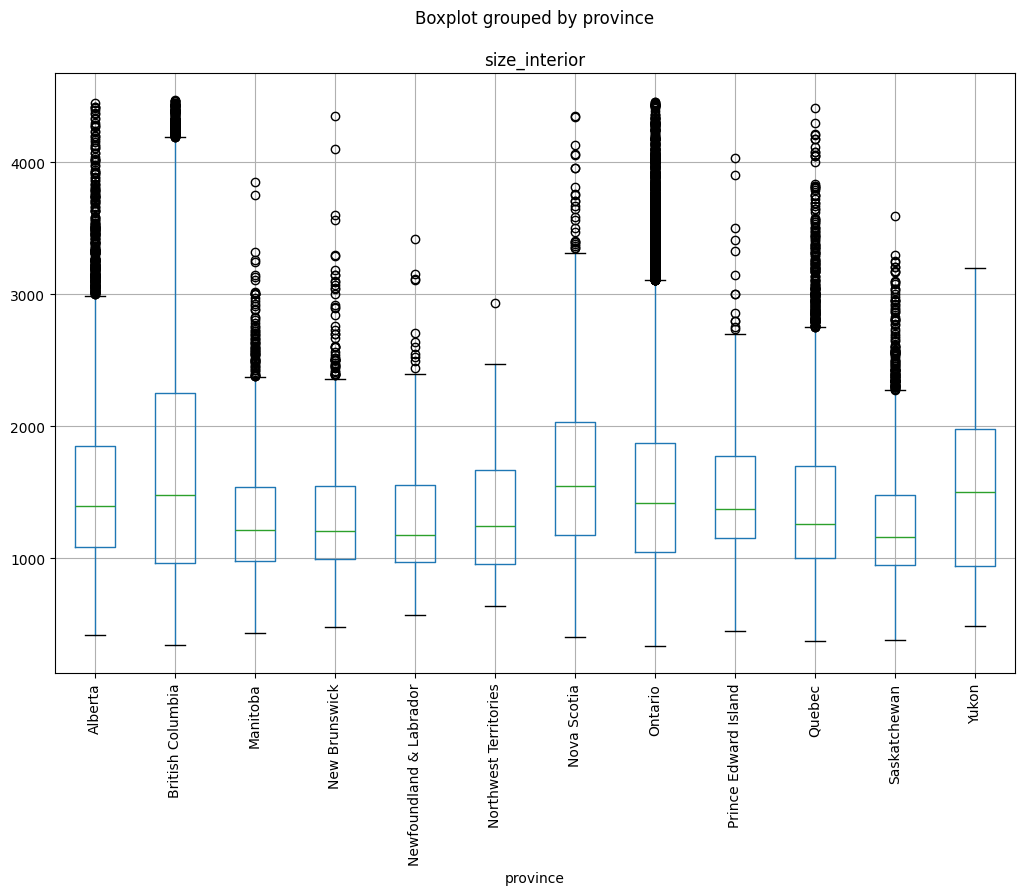

In [37]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117767 entries, 1 to 119939
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        117767 non-null  int64  
 1   id_mls                    117767 non-null  object 
 2   bathrooms_total           117767 non-null  float64
 3   bedrooms_extra            117767 non-null  float64
 4   bedrooms                  117767 non-null  float64
 5   stories_total             117767 non-null  float64
 6   size_interior             117767 non-null  float64
 7   building_type             117767 non-null  object 
 8   agency_name               117767 non-null  object 
 9   agency_type               117767 non-null  object 
 10  property_type             117767 non-null  object 
 11  lng                       117767 non-null  float64
 12  lat                       117767 non-null  float64
 13  ownership_type            117767 non-null  object

In [39]:
df["province"].value_counts()

province
Ontario                    54430
British Columbia           26541
Alberta                    16138
Quebec                      7941
Saskatchewan                4721
Manitoba                    3550
Nova Scotia                 2000
New Brunswick               1459
Prince Edward Island         428
Newfoundland & Labrador      398
Yukon                        105
Northwest Territories         56
Name: count, dtype: int64

In [40]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       54430.0
mean       922451.0
std        530904.0
min        159900.0
25%        599900.0
50%        799000.0
75%       1099000.0
max      10995000.0
Name: price, dtype: float64

In [41]:
df.to_csv("data/lof/data-lof-2024-04-29.csv", index=False)